# Anime Recommendation Model

**Problem Statement**: The objective is to create a content based Recommendation model using the 'Anime' and 'Rating' datasets which contain user rating and anime details. The goal of this project is to build a content-based recommendation system for anime, which utilizes features such as genre, type (e.g., TV show or movie), and episodes to recommend anime that share similar characteristics.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
df_anime=pd.read_csv('/content/anime.csv')
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df_rating=pd.read_csv('/content/rating.csv')
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Anime dataframe has 4 categorical variables

In [6]:
df_anime.shape

(12294, 7)

In [7]:
df_anime.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [8]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [9]:
df_rating.shape

(7813737, 3)

In [10]:
df_rating.isnull().sum()

,0
user_id,0
anime_id,0
rating,0


In [11]:
df_anime.dtypes

,0
anime_id,int64
name,object
genre,object
type,object
episodes,object
rating,float64
members,int64


In [12]:
df_anime.loc[df_anime['episodes'] == 'Unknown', 'episodes'] = '-1'
df_anime['episodes'] = df_anime['episodes'].astype('int64')

In [13]:
df_anime.dtypes

,0
anime_id,int64
name,object
genre,object
type,object
episodes,int64
rating,float64
members,int64


In [14]:
df_merged = pd.merge(df_anime, df_rating, on='anime_id', how='inner')
df_merged


,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [15]:
df_merged = df_merged.rename(columns={'rating_x': 'anime_rating', 'rating_y': 'user_rating'})

In [16]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   anime_id      int64  
 1   name          object 
 2   genre         object 
 3   type          object 
 4   episodes      int64  
 5   anime_rating  float64
 6   members       int64  
 7   user_id       int64  
 8   user_rating   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 536.5+ MB


In [17]:
df_merged.isnull().sum()

,0
anime_id,0
name,0
genre,110
type,4
episodes,0
anime_rating,6
members,0
user_id,0
user_rating,0


In [18]:
df_anime.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
episodes,12294.0,12.012445,46.264788,-1.00,1.00,2.00,12.00,1818.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [19]:
df_anime.describe(include=object)

,name,genre,type
count,12294,12232,12269
unique,12292,3264,6
top,Shi Wan Ge Leng Xiaohua,Hentai,TV
freq,2,823,3787


In [20]:
df_rating.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,7813737.0,36727.956745,20997.946119,1.0,18974.0,36791.0,54757.0,73516.0
anime_id,7813737.0,8909.072104,8883.949636,1.0,1240.0,6213.0,14093.0,34519.0
rating,7813737.0,6.144030,3.727800,-1.0,6.0,7.0,9.0,10.0


In [21]:
df_rating.duplicated().sum()

1

In [22]:
df_merged.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'anime_rating',
       'members', 'user_id', 'user_rating'],
      dtype='object')

In [23]:
df_anime.duplicated().sum()


0

In [24]:
 #Creating a dataframe for rating counts
Total_rating = df_merged.dropna(axis = 0, subset = ['name'])
anime_ratingCount = (Total_rating.
     groupby(by = ['name'])['user_rating'].
     count().
     reset_index().rename(columns = {'anime_rating': 'totalRatingCount'})
    [['name', 'user_rating']]
    )



In [55]:
anime_ratingCount

,name,user_rating
0,&quot;0&quot;,26
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,2
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,782
3,&quot;Bungaku Shoujo&quot; Memoire,809
4,&quot;Bungaku Shoujo&quot; Movie,1535
...,...,...
11191,xxxHOLiC Kei,3413
11192,xxxHOLiC Movie: Manatsu no Yoru no Yume,2365
11193,xxxHOLiC Rou,1513
11194,xxxHOLiC Shunmuki,1974


Text(0, 0.5, 'User Rating count')

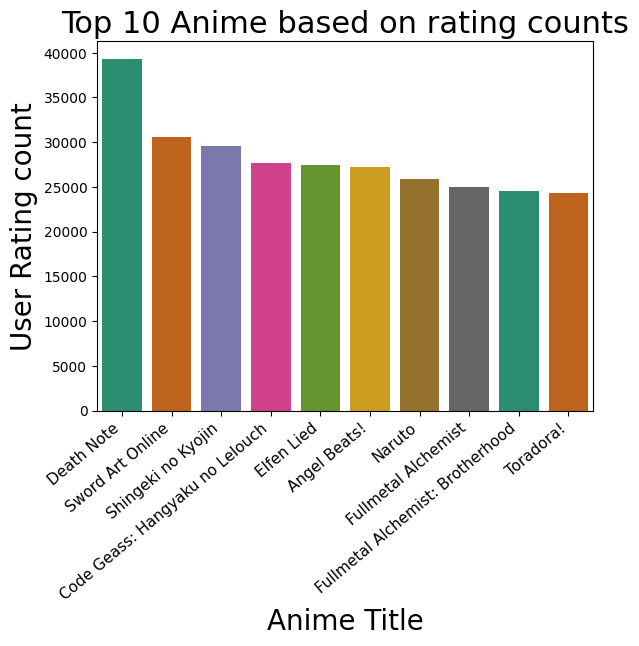

In [25]:

top10_animerating=anime_ratingCount[['name', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="name", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime Title',fontsize = 20)
ax.set_ylabel('User Rating count', fontsize = 20)

In [26]:
df_anime.drop_duplicates(subset=['name'], inplace=True)
df_merged.drop_duplicates(subset=['name'], inplace=True)

Text(0, 0.5, 'Members')

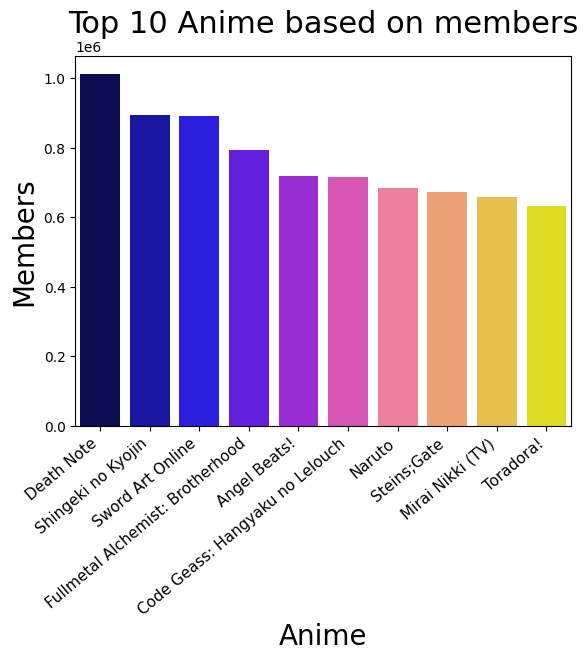

In [27]:
top10_members=df_merged[['name', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="name", y="members", data=top10_members, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20)
ax.set_ylabel('Members', fontsize = 20)

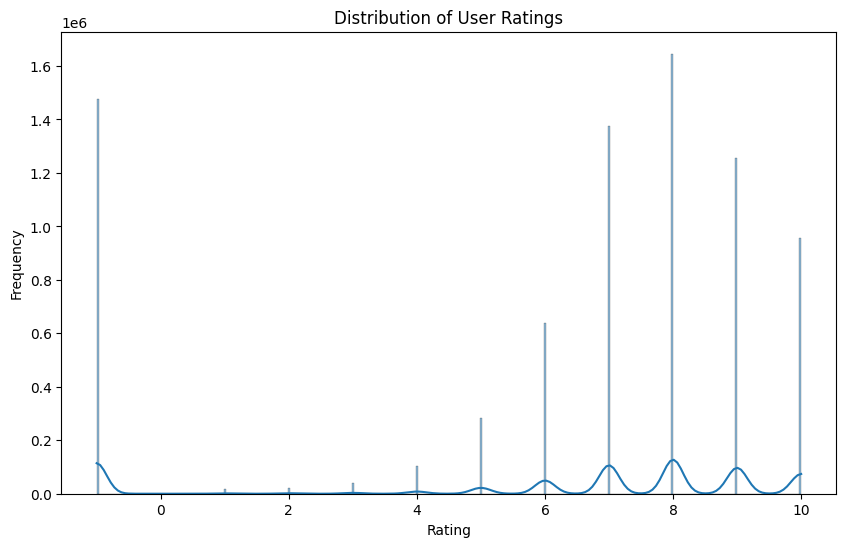

In [28]:
#User rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_rating['rating'], kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

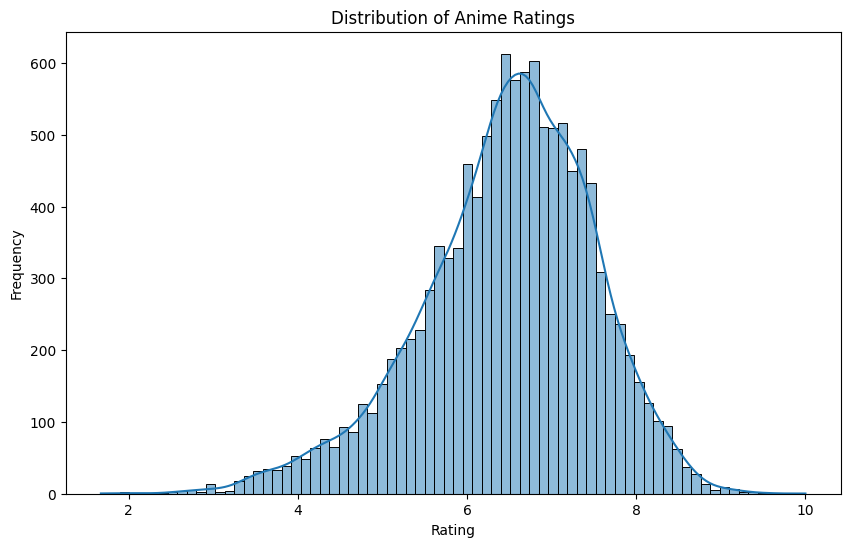

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df_anime['rating'], kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

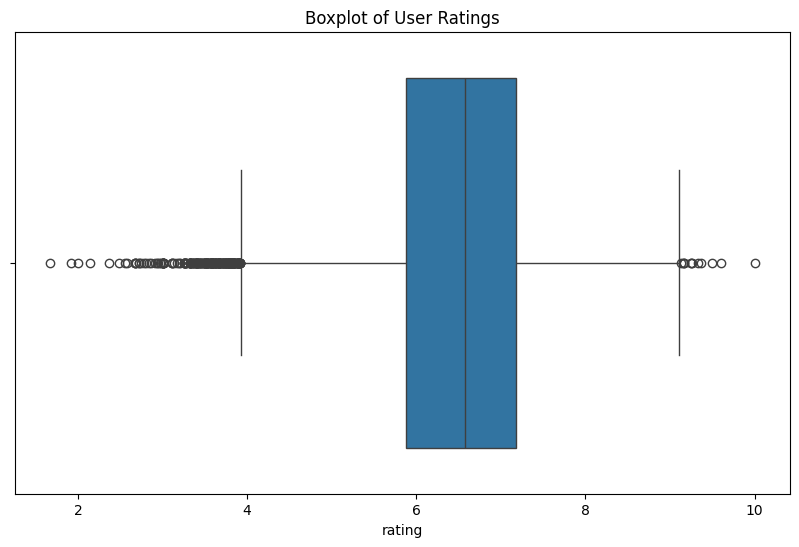

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_anime['rating'])
plt.title('Boxplot of User Ratings')
plt.show()

In [31]:
# Delete duplicated items
df_rating = df_rating.drop_duplicates(['user_id', 'anime_id'])

In [32]:
df_anime['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

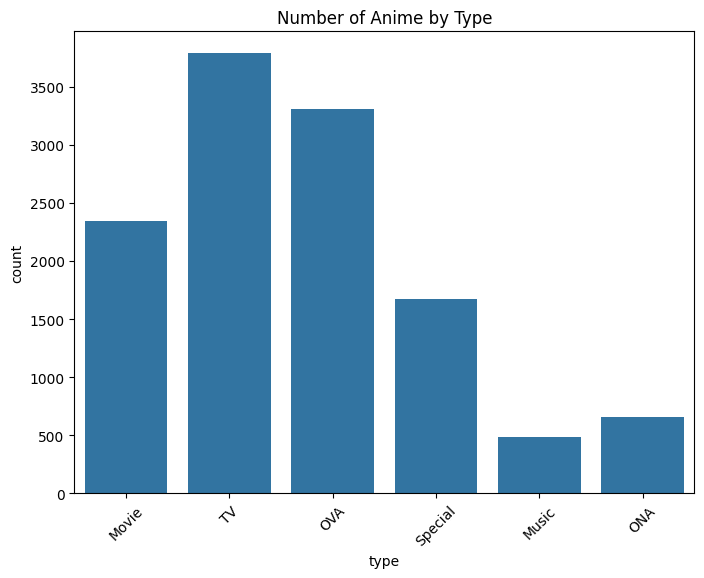

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df_anime)
plt.title('Number of Anime by Type')
plt.xticks(rotation=45)
plt.show()


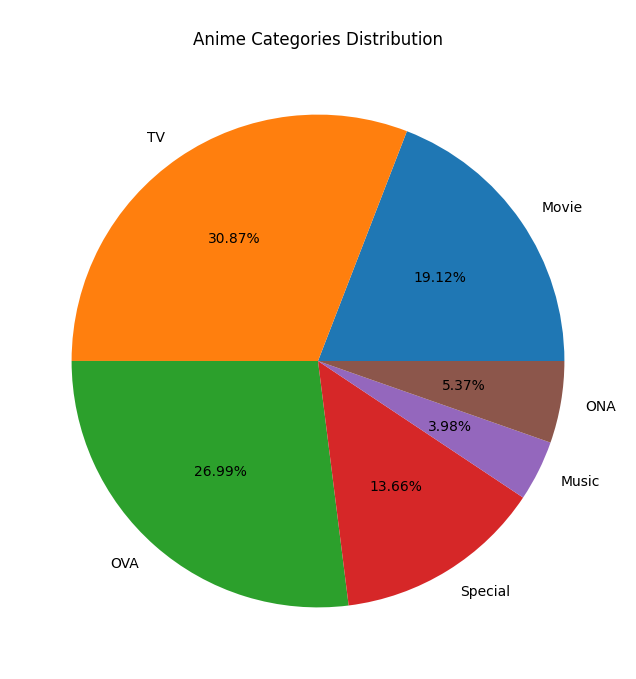

In [34]:
plt.subplots(figsize=(8, 8))
top_anime = df_anime.sort_values(["members"],ascending=False)
labels = 'Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'
sizes = [
    len(top_anime[top_anime["type"] == "Movie"]),
    len(top_anime[top_anime["type"] == "TV"]),
    len(top_anime[top_anime["type"] == "OVA"]),
    len(top_anime[top_anime["type"] == "Special"]),
    len(top_anime[top_anime["type"] == "Music"]),
    len(top_anime[top_anime["type"] == "ONA"])
]

plt.pie(sizes, labels=labels, autopct="%.2f%%")
plt.title("\nAnime Categories Distribution")
plt.show()

TV and OVA have
nsights:

30.87% of the anime's were  on TV followed by 19.14% through Movie
26.99% of anime's are streamed as OVA which is greater than ONA(5.37%)

In [35]:
df_anime.episodes.value_counts()

,count
episodes,
1,5675
2,1076
12,816
13,572
26,514
...,...
358,1
366,1
201,1


In [36]:
df_anime.genre.value_counts()

,count
genre,
Hentai,823
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
...,...
"Action, Comedy, Police, Romance, Sci-Fi",1
"Adventure, Drama, Fantasy, Game, Sci-Fi",1
"Adventure, Demons, Fantasy, Historical",1


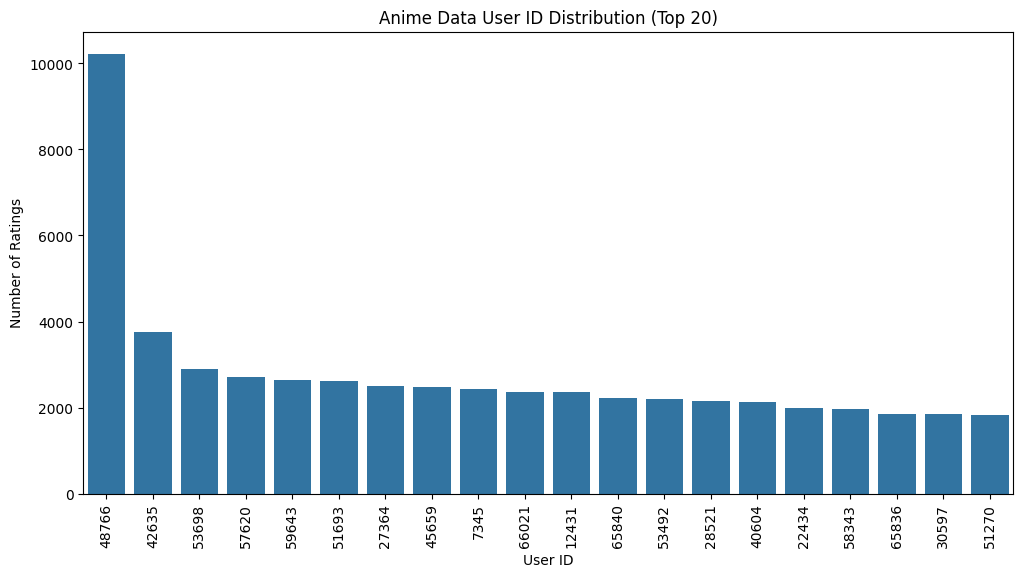

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='user_id', data=df_rating, order=df_rating['user_id'].value_counts().index[:20]) # Displaying top 20 users for better visualization
plt.title('Anime Data User ID Distribution (Top 20)')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()


In [38]:
df_merged.groupby('genre')['user_rating'].mean().sort_values(ascending=False).head()

,user_rating
genre,
"Action, Super Power",10.0
"Drama, Fantasy, Mystery, Sci-Fi, Shounen",10.0
"Drama, Romance, School, Shoujo, Sports",10.0
"Action, Adventure, Ecchi, Fantasy, Magic, School, Shounen",10.0
"Action, Mecha, Mystery, Police",10.0


In [39]:
df_merged.groupby('name')['user_rating'].mean().sort_values(ascending=False).head()

,user_rating
name,
Precure All Stars Movie DX2: Kibou no Hikari☆Rainbow Jewel wo Mamore!,10.0
Hayate no Gotoku! Cuties,10.0
Mahou Shoujo Pretty Sammy (1996),10.0
Tsurupika Hagemaru-kun,10.0
Shin Megami Tensei Devil Children: Light &amp; Dark,10.0


In [40]:
df_merged.groupby('genre')['anime_rating'].mean().sort_values(ascending=False).head()

,anime_rating
genre,
"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",9.26
"Drama, Fantasy, Romance, Slice of Life, Supernatural",9.06
"Drama, School, Shounen",9.05
"Action, Drama, Mecha, Military, Sci-Fi, Super Power",8.98
"Adventure, Drama, Supernatural",8.93


In [41]:
df_merged.groupby('type')['user_rating'].mean().sort_values(ascending=False).head()

,user_rating
type,
TV,3.897707
Special,3.762326
Music,3.656319
Movie,3.633349
ONA,3.429112


,user_rating
anime_rating,
8.73,10.0
9.10,10.0
8.77,10.0
8.81,9.0
8.55,9.0


In [40]:
df_merged.groupby('name')['anime_id'].mean().sort_values(ascending=False).head()

,anime_id
name,
Mobile Suit Gakuen: G-Reco Koushien,34519.0
Platonic Chain: Ansatsu Jikkouchuu,34476.0
Monster Strike: Rain of Memories,34475.0
Hashiri Hajimeta bakari no Kimi ni,34412.0
Long Riders Recap,34367.0


In [42]:
#df_copy=df_merged.copy()
df_merged["user_rating"].replace({-1: np.nan}, inplace=True)
df_merged.head()

,anime_id,name,genre,type,episodes,anime_rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10.0
26773,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,NaN
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9.0
47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9.0


In [43]:
df_merged.user_rating.value_counts()

,count
user_rating,
7.0,1566
6.0,1149
8.0,1127
5.0,748
9.0,660
10.0,431
3.0,410
4.0,403
2.0,213


In [44]:
df_merged['user_id'].value_counts()

,count
user_id,
48766,1171
12431,504
5,339
201,323
54,296
...,...
1396,1
1679,1
5086,1


Observation :We will consider minimum 200 ratings by the user as threshold value as their are users who have  rated only once, it can't be considered a valuable record for recommendation.

In [45]:
counts = df_merged['user_id'].value_counts()
df_merged = df_merged[df_merged['user_id'].isin(counts[counts >= 200].index)]


In [46]:
anime_rating=df_merged.pivot_table(index='name',columns='user_id',values='user_rating').fillna(0)
anime_rating.head()

user_id,5,17,201,342,12431
name,,,,,
001,0.0,0.0,0.0,0.0,3.0
2005-nen Uchuu no Tabi,0.0,0.0,0.0,0.0,5.0
2010,0.0,0.0,0.0,0.0,3.0
3-Nen C-Gumi 14-Ban Kubozono Chiyoko no Nyuukaku,0.0,0.0,0.0,0.0,6.0
7-kakan.,0.0,0.0,0.0,0.0,3.0


# Checking Skewness

In [41]:
df_merged.select_dtypes(include='number').skew()

,0
anime_id,1.003054
episodes,10.973311
anime_rating,-0.610873
members,1.739900
user_id,-0.015279
user_rating,-1.110758


In [34]:
df_rating.skew()

,0
user_id,-0.015279
anime_id,1.003052
rating,-1.110754


In [42]:
df_anime.select_dtypes(include='number').skew()

,0
anime_id,0.441550
episodes,23.659130
rating,-0.543570
members,6.682934


The variable 'members' has higher skew value

In [42]:
#df_merged['log_members'] = df_merged['members'].apply(lambda x: pd.np.log(x + 1))

In [43]:
df_merged.head()

,anime_id,name,genre,type,episodes,anime_rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [ ]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

df_anime['name'] = df_anime['name'].apply(text_cleaning)

# Content Based Recommendation sysytem

Now let's create a matrix that has the user ids on one access and the anime id on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
user_item_matrix = df_rating.pivot(index='user_id', columns='anime_id', values='rating')

In [45]:
user_item_matrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,34283,34324,34325,34349,34358,34367,34412,34475,34476,34519
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,8.0,NaN,NaN,6.0,NaN,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73513,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_similarity = cosine_similarity(user_item_matrix.fillna(0))

In [ ]:
user_similarity

array([[ 1.        , -0.04225847,  0.01613407, ..., -0.04999758,
         0.01393471, -0.02738315],
       [-0.04225847,  1.        ,  0.13368172, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01613407,  0.13368172,  1.        , ...,  0.18078298,
         0.22144466,  0.07370439],
       ...,
       [-0.04999758,  0.        ,  0.18078298, ...,  1.        ,
         0.21555849,  0.02972552],
       [ 0.01393471,  0.        ,  0.22144466, ...,  0.21555849,
         1.        ,  0.01503783],
       [-0.02738315,  0.        ,  0.07370439, ...,  0.02972552,
         0.01503783,  1.        ]])

In [49]:
user_item_matrix1= df_merged.pivot(index='user_id', columns='name', values='user_rating')


In [50]:
user_item_matrix1

name,0-sen Hayato,0-sen Hayato Pilot,001,12-sai.: Chicchana Mune no Tokimeki,15 Bishoujo Hyouryuuki,2005-nen Uchuu no Tabi,2010,21 Emon Uchuu e Irasshai!,21 Emon Uchuu ike! Hadashi no Princess,3-D Tengoku,...,ef: A Tale of Memories. - Prologue,gdgd Fairies,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,himitsukesshatakanotsume.jp,lilac (bombs Jun Togawa),makemagic,"on-chan, Yume Power Daibouken!",vivi,xxxHOLiC
user_id,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12431,NaN,NaN,3.0,NaN,NaN,5.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,2.0,NaN
48766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:

from sklearn.feature_extraction.text import TfidfVectorizer
df_anime['features'] = df_anime['genre'].fillna('') + ' ' + df_anime['type'].fillna('')

tfidf = TfidfVectorizer(stop_words='english',)
# Fit and transform the 'features' column
tfidf_matrix = tfidf.fit_transform(df_anime['features'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Concatenate with anime IDs for identification
tfidf_df = pd.concat([df_anime[['anime_id']], tfidf_df], axis=1)

# Now tfidf_df contains anime_id and their TF-IDF vectors
print(tfidf_df.head())


   anime_id    action  adventure   ai  arts  cars    comedy  dementia  demons  \
0   32281.0  0.000000   0.000000  0.0   0.0   0.0  0.000000       0.0     0.0   
1    5114.0  0.285156   0.307381  0.0   0.0   0.0  0.000000       0.0     0.0   
2   28977.0  0.244699   0.000000  0.0   0.0   0.0  0.196004       0.0     0.0   
3    9253.0  0.000000   0.000000  0.0   0.0   0.0  0.000000       0.0     0.0   
4    9969.0  0.244699   0.000000  0.0   0.0   0.0  0.196004       0.0     0.0   

      drama  ...  space  special  sports  super  supernatural  thriller  \
0  0.406466  ...    0.0      0.0     0.0    0.0      0.502558  0.000000   
1  0.325028  ...    0.0      0.0     0.0    0.0      0.000000  0.000000   
2  0.000000  ...    0.0      0.0     0.0    0.0      0.000000  0.000000   
3  0.000000  ...    0.0      0.0     0.0    0.0      0.000000  0.797366   
4  0.000000  ...    0.0      0.0     0.0    0.0      0.000000  0.000000   

         tv  vampire  yaoi  yuri  
0  0.000000      0.0   0.0 

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Let's enhance our original recommendation system by adding genre and type features.

# 1. Combine genre and type into a single feature
df_anime['content'] = df_anime['genre'].fillna('') + ' ' + df_anime['type'].fillna('')

# 2. Apply TF-IDF Vectorizer on 'content' (which is a combination of genre and type)
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2),analyzer='word')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_anime['content'])




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
df_merged['user_rating'] = movies_cleaned_df['overview'].fillna('')

In [46]:
tfidf_df.head()

,anime_id,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,...,space,special,sports,super,supernatural,thriller,tv,vampire,yaoi,yuri
0,32281,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.406427,...,0.0,0.0,0.0,0.0,0.502594,0.000000,0.000000,0.0,0.0,0.0
1,5114,0.285137,0.307353,0.0,0.0,0.0,0.000000,0.0,0.0,0.324992,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.252040,0.0,0.0,0.0
2,28977,0.244698,0.000000,0.0,0.0,0.0,0.196013,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.216295,0.0,0.0,0.0
3,9253,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.797356,0.292296,0.0,0.0,0.0
4,9969,0.244698,0.000000,0.0,0.0,0.0,0.196013,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.216295,0.0,0.0,0.0


In [52]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfidf_matrix, tfidf_matrix)

In [58]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [59]:
def get_recommendations(anime_name, cosine_sim=cosine_sim):
    idx = df_anime[df_anime['name'] == anime_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get top 5 recommendations excluding the anime itself
    anime_indices = [i[0] for i in sim_scores]
    return df_anime['name'].iloc[anime_indices]

Testing the recommendation function

In [60]:
# Testing our content-based recommendation system
recommendations = get_recommendations('Kimi no Na wa.')
print("\nRecommended Anime for 'Kimi no Na wa.':")
print(recommendations)


Recommended Anime for 'Kimi no Na wa.':
1111    Aura: Maryuuin Kouga Saigo no Tatakai
1494                                 Harmonie
1959                                Air Movie
6394             Wind: A Breath of Heart (TV)
5805              Wind: A Breath of Heart OVA
Name: name, dtype: object


In [61]:
#Taking user input for anime
name=input("Enter the anime name: ")

#use the recommendation method created
print("\nRecommended Anime for",name,":")
recommendations = get_recommendations(name)
print(recommendations)

Enter the anime name: One Piece

Recommended Anime for One Piece :
86                                      Shingeki no Kyojin
10899                          Shingeki no Kyojin Season 2
231      One Piece: Episode of Merry - Mou Hitori no Na...
241      One Piece: Episode of Nami - Koukaishi no Nami...
896      One Piece: Episode of Sabo - 3 Kyoudai no Kizu...
Name: name, dtype: object


In conclusion, content-based recommendation models are a powerful tool for providing personalized suggestions based on the inherent features of items and a user’s past preferences. By analyzing item attributes and comparing them to user profiles, these systems can effectively recommend items that align with individual tastes, even without relying on other users' data. However, they do have limitations, such as a tendency to recommend similar items and the need for effective feature engineering. Despite these challenges, content-based filtering remains an essential method in many recommendation systems, especially when combined with other approaches like collaborative filtering for a more robust solution.

In conclusion, this project demonstrates the end-to-end process of building a content-based recommender system for anime using the Anime Recommendations dataset. Through data preprocessing, exploratory data analysis (EDA), and the creation of feature vectors, we successfully built a model that recommends anime based on content similarities. By utilizing cosine similarity on genre-based features, the system offers personalized suggestions that align with a user's past preferences. The project also highlights the importance of visualizations and feature engineering in making the model more effective.